## LetsGrowMore - LGMVIP

### Task 4

### Stock Market Prediction And Forecasting Using Stacked LSTM

### Name - Sonali Waingade

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

#### Reading the Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
data=df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
data.reset_index(inplace=True)

In [8]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


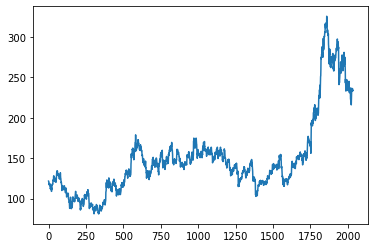

In [9]:
plt.plot(data['Close'])

In [10]:
df=data['Close']
df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

#### Min Max Scalar

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [12]:
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1373, 50)
(1373,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(560, 50)
(560,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
pip install numpy==1.19.5

Note: you may need to restart the kernel to use updated packages.


#### LSTM Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 25)            2700      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 25)            5100      
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 12,926
Trainable params: 12,926
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_split=0.1,epochs=30,batch_size=64,verbose=1)

Epoch 1/30
20/20 [==============================] - 25s 262ms/step - loss: 0.0075 - val_loss: 0.0015
Epoch 2/30
20/20 [==============================] - 2s 90ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/30
20/20 [==============================] - 2s 93ms/step - loss: 9.9686e-04 - val_loss: 0.0012
Epoch 4/30
20/20 [==============================] - 2s 89ms/step - loss: 9.0035e-04 - val_loss: 0.0012
Epoch 5/30
20/20 [==============================] - 2s 93ms/step - loss: 8.6769e-04 - val_loss: 0.0012
Epoch 6/30
20/20 [==============================] - 2s 95ms/step - loss: 8.5646e-04 - val_loss: 0.0011
Epoch 7/30
20/20 [==============================] - 2s 94ms/step - loss: 8.3042e-04 - val_loss: 0.0011
Epoch 8/30
20/20 [==============================] - 2s 93ms/step - loss: 8.0836e-04 - val_loss: 0.0011
Epoch 9/30
20/20 [==============================] - 2s 92ms/step - loss: 8.2061e-04 - val_loss: 0.0010
Epoch 10/30
20/20 [==============================] - 2s 94ms/step - loss: 8.164

#### Prediction and checking performance

In [22]:
test_predict=model.predict(X_test)

In [23]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[127.18205 ],
       [127.04535 ],
       [126.95787 ],
       [127.045654],
       [127.38013 ],
       [128.0904  ],
       [129.06888 ],
       [130.16739 ],
       [131.28128 ],
       [132.22708 ],
       [132.95694 ],
       [133.45412 ],
       [133.7037  ],
       [133.76482 ],
       [133.69519 ],
       [133.42087 ],
       [132.98332 ],
       [132.63258 ],
       [132.3517  ],
       [132.1246  ],
       [132.03795 ],
       [131.98486 ],
       [132.22783 ],
       [132.90565 ],
       [134.04025 ],
       [135.43071 ],
       [136.75772 ],
       [137.72916 ],
       [138.40051 ],
       [138.85669 ],
       [139.33957 ],
       [139.91457 ],
       [140.28052 ],
       [140.34712 ],
       [140.12534 ],
       [139.7475  ],
       [139.29066 ],
       [138.88231 ],
       [138.69273 ],
       [138.5986  ],
       [138.60721 ],
       [138.72769 ],
       [138.94304 ],
       [139.18988 ],
       [139.38489 ],
       [139.563   ],
       [139.73232 ],
       [139.9

In [24]:
import math
from sklearn.metrics import mean_squared_error

In [25]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.08107599106877275